In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('SDN_Intrusion.csv')

In [5]:
data


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,80,9865922,5,0,30,0,6,6,6.000000,...,20,1986.00000,0.0000,1986,1986,9.863936e+06,0.00000,9863936,9863936,DDoS
1,1,443,158423,24,22,703,24564,453,0,29.291667,...,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,2,443,61163904,14,12,993,3445,620,0,70.928571,...,20,147216.66670,152989.5108,459505,84515,1.000000e+07,21747.04690,10100000,9999779,BENIGN
3,3,443,110544045,18,18,1213,4216,812,0,67.388889,...,20,75305.72727,133115.4997,476664,35046,9.970950e+06,80601.91884,10000000,9728297,BENIGN
4,4,53,185,2,2,104,136,52,52,52.000000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188328,1188328,138,23,13,0,3029,0,233,233,233.000000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
1188329,1188329,50898,7188897,1,5,6,30,6,6,6.000000,...,20,10378.00000,0.0000,10378,10378,7.178519e+06,0.00000,7178519,7178519,BENIGN
1188330,1188330,53,153,2,2,46,46,23,23,23.000000,...,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
1188331,1188331,80,1868954,6,0,36,0,6,6,6.000000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,DDoS


In [6]:
print(data.columns)
print(data.isna().sum())
print(data.info())
print(data.describe())

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Lengt

C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


         Unnamed: 0   Destination Port   Flow Duration   Total Fwd Packets  \
count  1.188333e+06       1.188333e+06    1.188333e+06        1.188333e+06   
mean   5.941660e+05       8.480243e+03    1.462180e+07        9.596210e+00   
std    3.430423e+05       1.915062e+04    3.176010e+07        7.448225e+02   
min    0.000000e+00       0.000000e+00   -1.000000e+00        1.000000e+00   
25%    2.970830e+05       5.300000e+01    1.679600e+04        2.000000e+00   
50%    5.941660e+05       8.000000e+01    2.791840e+05        3.000000e+00   
75%    8.912490e+05       4.430000e+02    6.103837e+06        5.000000e+00   
max    1.188332e+06       6.553200e+04    1.200000e+08        2.007550e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             1.188333e+06                 1.188333e+06   
mean              1.078102e+01                 7.843011e+02   
std               9.896083e+02                 5.758152e+03   
min               0.000000e+00               

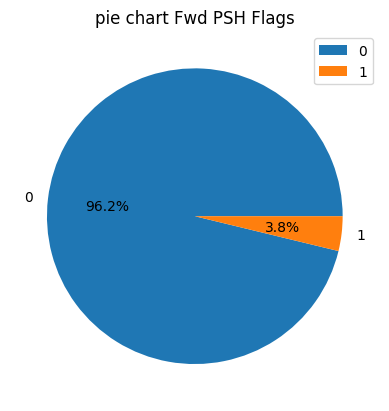

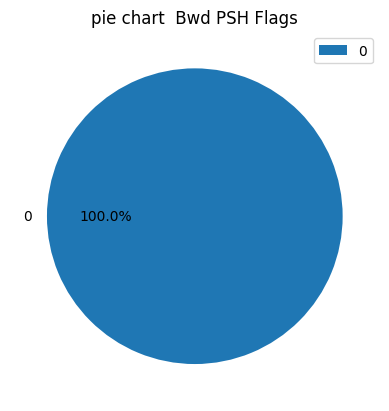

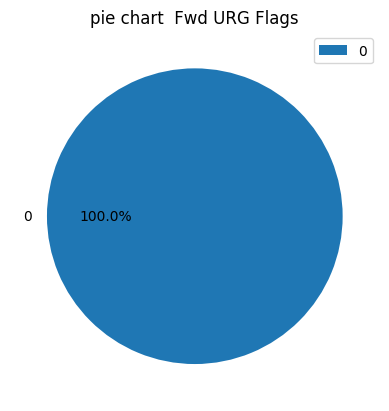

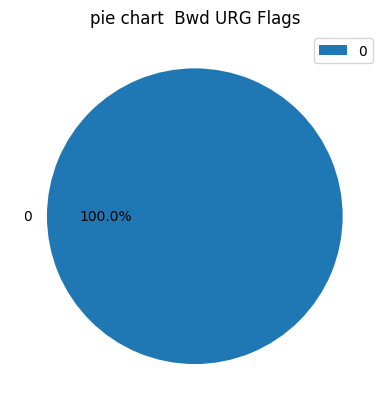

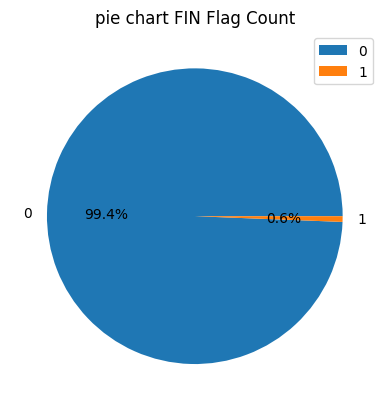

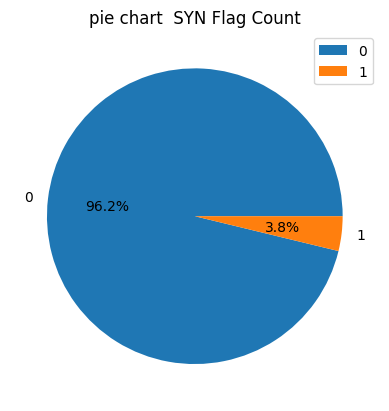

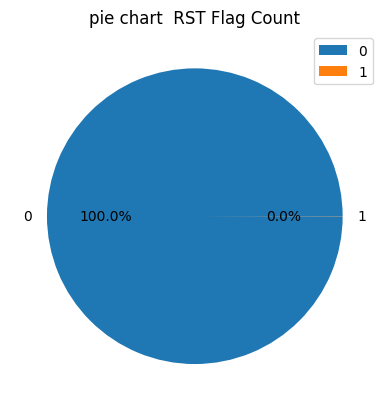

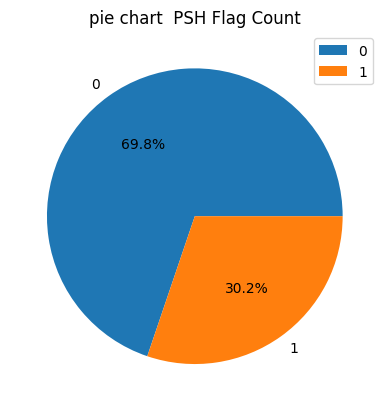

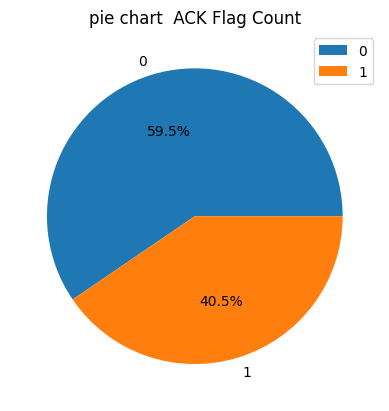

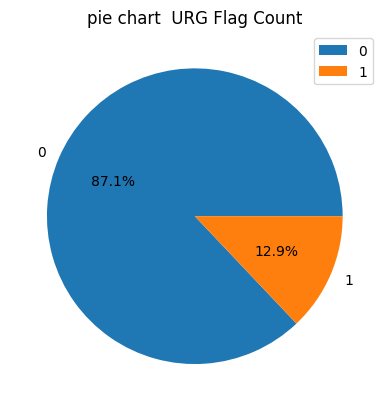

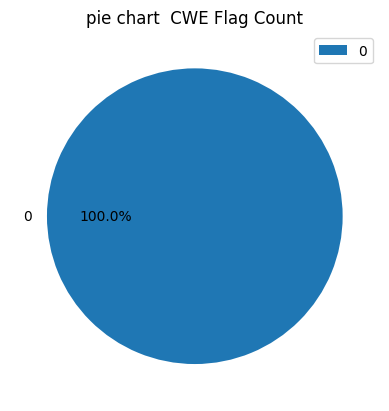

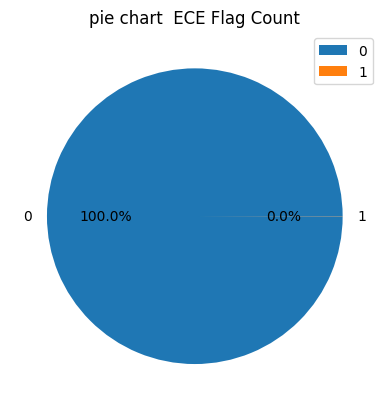

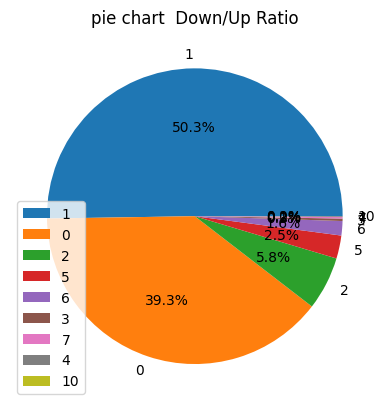

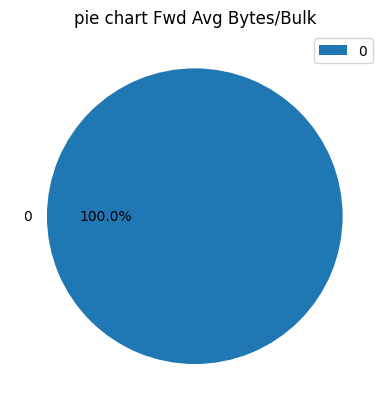

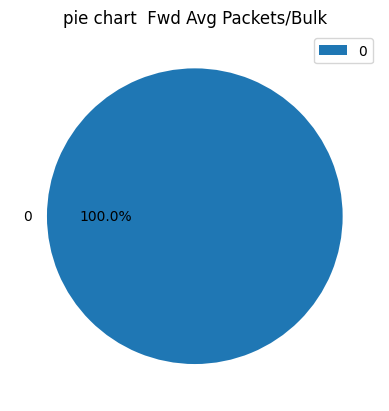

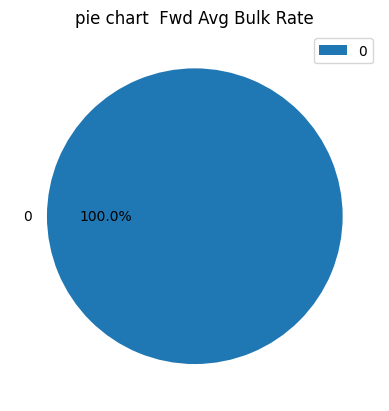

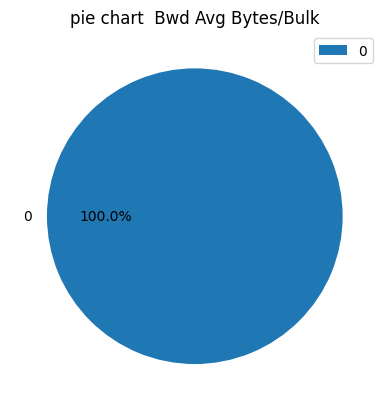

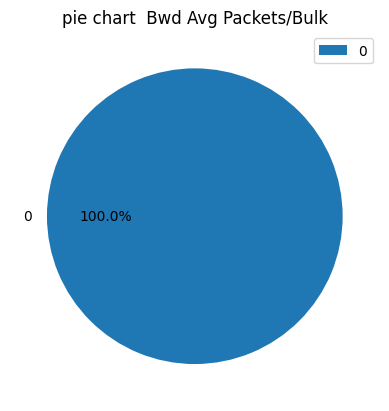

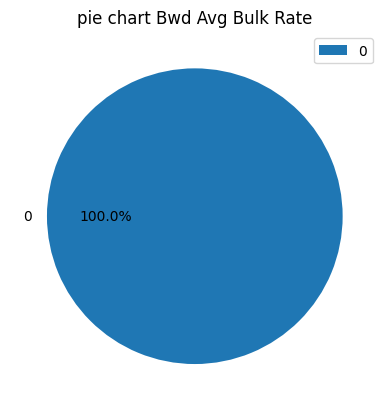

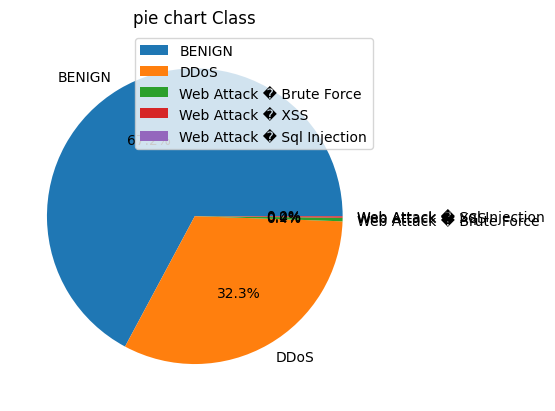

In [7]:
for i in data.columns.values:
    if len(data[i].value_counts()) <=10:
        indexs=data[i].value_counts().index
        value=data[i].value_counts().values
        plt.pie(value,labels=indexs,autopct='%1.1f%%')
        plt.title(f"pie chart {i}")
        plt.legend()
        plt.show()

In [8]:
for i in data.select_dtypes(include='number').columns.values:
    if data[i].skew() > 0:
        data[i]=data[i].fillna(data[i].mean())
    elif data[i].skew() < 0:
        data[i]=data[i].fillna(data[i].median())

lab=LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i]=lab.fit_transform(data[i])

X=[]
for i in data.columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    outliers=np.abs((data['z-scores']>3))
    if outliers.sum() >0.2:
        X.append(i)
    
X=[]
for i in data.columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    outliers=np.abs((data['z-scores']>3))
    if outliers.sum() >0:
        X.append(i)

thresh=2.5
for i in data[X[:38]].columns.values:
    upper=data[i].mean()+thresh * data[i].std()
    lower=data[i].mean()-thresh * data[i].std()
    data=data[(data[i]<upper)&(data[i]>lower)]

x=[]
corr=data.corr()['Class']
corr=corr.drop(['z-scores','Class'])
for i in corr.index:
    if corr[i]>0.2 and corr[i] <0.65:
        print(corr[i])
        x.append(i)

print(x)

C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


0.5743091267934769
0.47827364982548254
0.42947272229577876
0.5913017360092115
0.5794571692762254
0.3077754369445641
0.2573256056241639
0.3077754369445641
0.47827364982548254
0.4847786305763004
[' Flow Duration', ' Total Fwd Packets', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Fwd Header Length', ' ACK Flag Count', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' act_data_pkt_fwd']


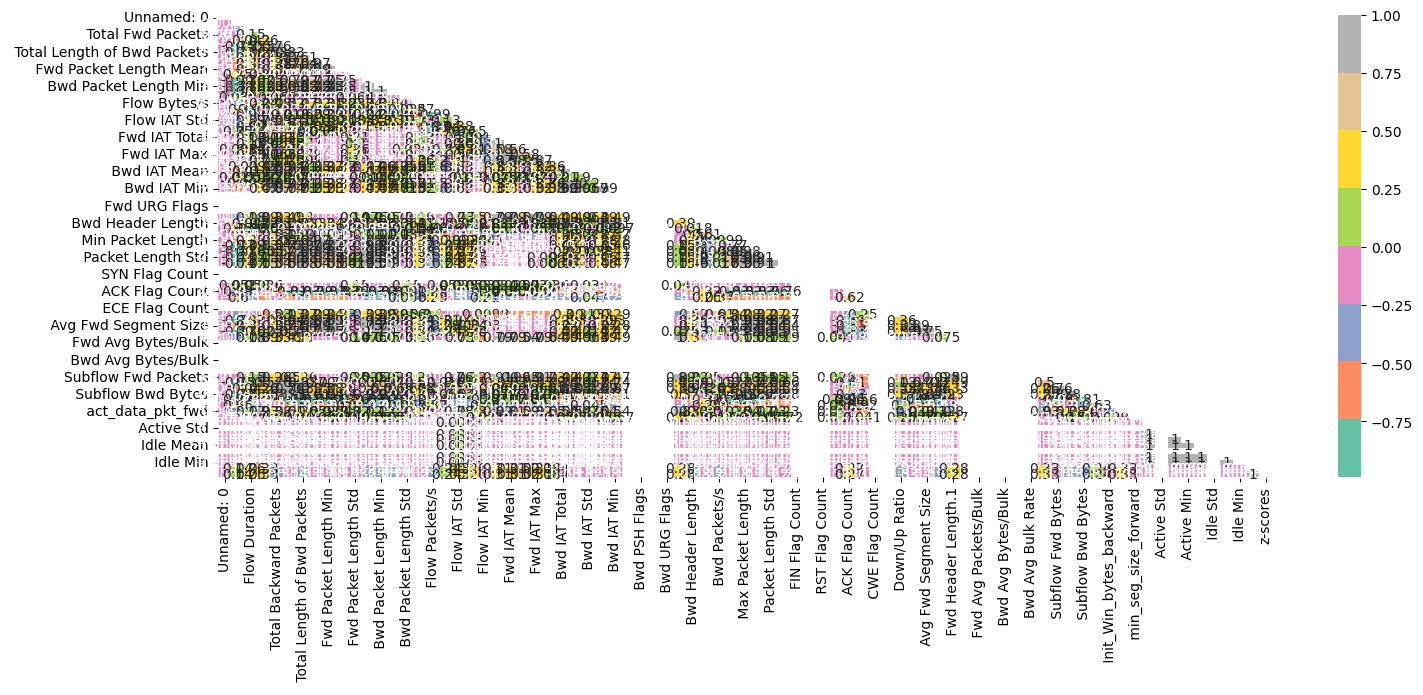

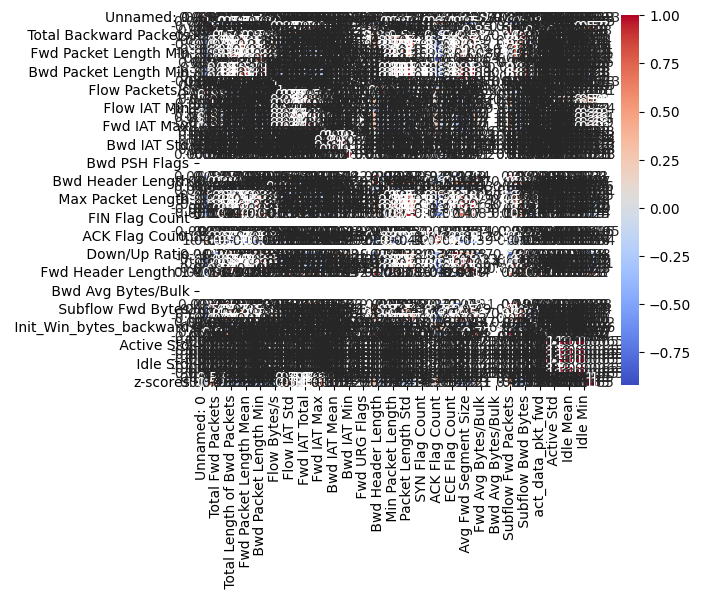

In [9]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
pip install lazypredict

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
#from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble._bagging import BaggingClassifier
from keras.layers import Dense
from keras.models import  Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras.activations,keras.losses

In [13]:
x=[]
corr=data.corr()['Class']
corr=corr.drop(['z-scores','Class'])
for i in corr.index:
    if corr[i]>0.2 and corr[i] <0.8:
        print(corr[i])
        x.append(i)

x=data[x]
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y)

lr = LogisticRegression(max_iter=35)
lr.fit(x_train, y_train)
print('The logistic regression: ', lr.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='gini', max_depth=1)
tree.fit(x_train, y_train)
print('Dtree ', tree.score(x_test,y_test))

rforest = RandomForestClassifier(criterion='gini',max_depth=1)
rforest.fit(x_train, y_train)
print('The random forest: ', rforest.score(x_test, y_test))

0.5743091267934769
0.47827364982548254
0.42947272229577876
0.5913017360092115
0.5794571692762254
0.6867169756815054
0.6639090054407102
0.6831927678291089
0.6869203244662554
0.3077754369445641
0.2573256056241639
0.3077754369445641
0.47827364982548254
0.4847786305763004
The logistic regression:  0.9974584125588817
Dtree  0.9860117142338451
The random forest:  0.9850848947534373




Epoch 1/30


15699/15699 [==============================] - 17s 1ms/step - loss: 0.1925 - accuracy: 0.9623
Epoch 2/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 3/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1637 - accuracy: 0.9632
Epoch 4/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1637 - accuracy: 0.9632
Epoch 5/30
15699/15699 [==============================] - 17s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 6/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 7/30
15699/15699 [==============================] - 17s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 8/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 9/30
15699/15699 [==============================] - 16s 1ms/step - loss: 0.1638 - accuracy: 0.9632
Epoch 10/30
15699/15699 [==========================

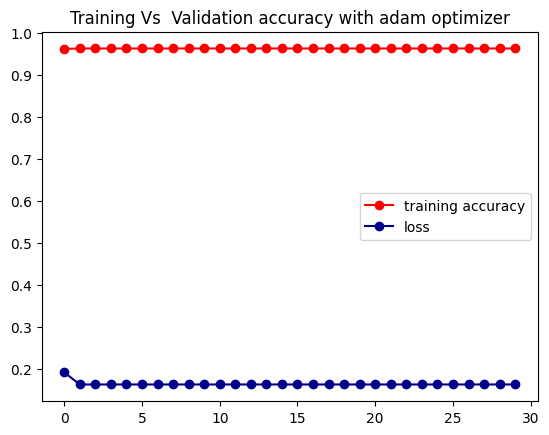

In [14]:
Y=pd.get_dummies(y)
x_tran,x_tst,y_tran,y_tst=train_test_split(x,Y)

models=Sequential()
models.add(Dense(units=x.shape[1],input_dim=x.shape[1],activation=keras.activations.relu))
models.add(Dense(units=x.shape[1],activation=keras.activations.relu))
models.add(Dense(units=x.shape[1],activation=keras.activations.tanh))
models.add(Dense(units=x.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=x.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
hist=models.fit(x_tran,y_tran,batch_size=20,epochs=30)
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs  Validation accuracy with adam optimizer')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
feat_num=[5, 10, 15, 20, 25, 30]
for i in feat_num:
    #X_train = np.reshape(X_train, (X_train.shape[0], 2, feat_num))

    #X_trains = X_train[:, idx]
    #X_tests = X_test[:, idx]

    #X_trains = X_train[:, idx[0:feat_num]]
    #X_tests= X_test[:, idx[0:feat_num]]

    X_trains = x_train[:, idx[:1,0:i ]]
    X_tests= x_test[:, idx[:1,0:i ]]


    model = Sequential()
    #X_trains = np.reshape(X_trains, (X_trains.shape[0], 3, feat_num))

    # first parameter is output size=1
    model.add(LSTM(50, input_shape=(1,i)))
    model.add(Dense(1))
    model.summary()
    model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])
    history=model.fit(X_trains, y_train, epochs=20, validation_data=(X_tests, y_test), batch_size=72, verbose=2, shuffle=False)
    result=model.predict(X_tests)

    pyplot.plot(history.history['loss'], label='result1')
    pyplot.plot(history.history['val_loss'], label='result1')
    pyplot.show()

    # Convert prediction probabilities to binary output
    y_pred = [1 if res > 0.5 else 0 for res in result]
    
    # Calculate Metrics
    #print(f"\nFor feature number = {i}")
    print("Detection Rate (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precision, Recall, F-score, Support:", precision_recall_fscore_support(y_test, y_pred, average='macro'))

    # Calculate False Positive Rate from confusion matrix
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #fpr = fp / (fp + tn)
    #print("False Positive Rate:", fpr)

    scores = model.evaluate(X_tests, y_test, batch_size=64)
    print("Test loss, test acc:", scores, '\n')
    


    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    num_classes = cm.shape[0]

    precision_list = []
    recall_list = []
    fpr_list = []

    for i in range(num_classes):
        TP_i = cm[i, i]
        FP_i = sum(cm[:, i]) - TP_i
        FN_i = sum(cm[i, :]) - TP_i
        TN_i = cm.sum() - (TP_i + FP_i + FN_i)

        precision_i = TP_i / (TP_i + FP_i)
        recall_i = TP_i / (TP_i + FN_i)
        fpr_i = FP_i / (FP_i + TN_i)

        precision_list.append(precision_i)
        recall_list.append(recall_i)
        fpr_list.append(fpr_i)

    print("Precision for each class:", precision_list)
    print("Recall for each class:", recall_list)
    

    macro_precision = precision_score(y_test, y_pred, average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')
    print(macro_precision)
    print(macro_recall)


    cm = confusion_matrix(y_test, y_pred)

    # Calculate the total true negatives, false positives, false negatives, and true positives
    TN = sum(sum(cm)) - sum(np.diag(cm))
    FP = sum(np.sum(cm, axis=0) - np.diag(cm))
    FN = sum(np.sum(cm, axis=1) - np.diag(cm))
    TP = sum(np.diag(cm))

    FPR = FP / (FP + TN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    print(precision)
    print(recall)
    print(FPR)

NameError: name 'idx' is not defined

In [18]:
idx = np.array(idx, dtype=int)

NameError: name 'idx' is not defined

In [24]:
idx=MRMR.mrmr(X, y, n_selected_features=30)

AttributeError: 'list' object has no attribute 'shape'

In [23]:
from skfeature.function.information_theoretical_based import MRMR

In [21]:
pip install skfeature

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skfeature (from versions: none)
ERROR: No matching distribution found for skfeature


In [25]:
df=pd.read_csv('SDN_Intrusion.csv',on_bad_lines='skip')
df.dropna(axis='columns')
empty_cols = [col for col in df.columns if df[col].isnull().any()]
empty_cols

['Flow Bytes/s']

In [26]:
pip install dataprep


     ---------------------------------------- 0.0/54.9 kB ? eta -:--:--
     -------------------------------------- 54.9/54.9 kB 950.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/152.0 kB ? eta -:--:--
     ----------------------------------- -- 143.4/152.0 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 152.0/152.0 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/694.6 kB ? eta -:--:--
     ------------- ------------------------ 245.8/694.6 kB 7.4 MB/s eta 0:00:01
     ----------------- -------------------- 317.4/694.6 kB 3.3 MB/s eta 0:00:01
     ----------------------------------- -- 645.1/694.6 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 694.6/694.6 kB 4.9 MB/s eta 0:00:00
  Preparing metad

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

In [27]:
!pip install dask

  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached partd-1.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 1.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.2 MB 1.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.2 MB 2.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.2 MB 2.2 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 2.3 MB/s eta 0:0

In [28]:
df.Class = pd.Categorical(df.Class)
df['code'] = df.Class.cat.codes
df['code']

0          1
1          0
2          0
3          0
4          0
          ..
1188328    0
1188329    0
1188330    0
1188331    1
1188332    0
Name: code, Length: 1188333, dtype: int8

In [29]:
df.drop('Class', inplace=True, axis=1)
df


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,code
0,0,80,9865922,5,0,30,0,6,6,6.00,...,20,1986.00,0.00,1986,1986,9863936.00,0.00,9863936,9863936,1
1,1,443,158423,24,22,703,24564,453,0,29.29,...,32,0.00,0.00,0,0,0.00,0.00,0,0,0
2,2,443,61163904,14,12,993,3445,620,0,70.93,...,20,147216.67,152989.51,459505,84515,10000000.00,21747.05,10100000,9999779,0
3,3,443,110544045,18,18,1213,4216,812,0,67.39,...,20,75305.73,133115.50,476664,35046,9970949.91,80601.92,10000000,9728297,0
4,4,53,185,2,2,104,136,52,52,52.00,...,20,0.00,0.00,0,0,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188328,1188328,138,23,13,0,3029,0,233,233,233.00,...,20,0.00,0.00,0,0,0.00,0.00,0,0,0
1188329,1188329,50898,7188897,1,5,6,30,6,6,6.00,...,20,10378.00,0.00,10378,10378,7178519.00,0.00,7178519,7178519,0
1188330,1188330,53,153,2,2,46,46,23,23,23.00,...,32,0.00,0.00,0,0,0.00,0.00,0,0,0
1188331,1188331,80,1868954,6,0,36,0,6,6,6.00,...,20,0.00,0.00,0,0,0.00,0.00,0,0,1


In [30]:
df2=df.dropna()

df2.drop('Unnamed: 0', inplace=True, axis=1)
df2 = df2[np.isfinite(df2).all(1)]

df2
df3=df2.sample(n=200000)

In [31]:
df4=df3.drop('code', axis=1)
df4
df4

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
356375,137,22,13,0,650,0,50,50,50.00,0.00,...,12,32,0.00,0.00,0,0,0.00,0.00,0,0
1140117,53,163,2,2,80,112,40,40,40.00,0.00,...,1,20,0.00,0.00,0,0,0.00,0.00,0,0
1127104,443,115490589,53,54,695,74196,322,0,13.11,54.45,...,4,32,39645.27,54633.72,204370,22874,10000000.00,8112.85,10000000,9997899
283868,80,1882603,3,5,26,11607,20,0,8.67,10.26,...,2,20,0.00,0.00,0,0,0.00,0.00,0,0
103607,39730,1708802,1,6,1375,30,1375,1375,1375.00,0.00,...,0,20,0.00,0.00,0,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635165,59567,97575764,6,9,11613,62,7215,0,1935.50,3122.94,...,4,20,36580.00,0.00,36580,36580,47900000.00,53800000.00,85900000,9835762
964188,53,218,2,2,90,294,45,45,45.00,0.00,...,1,32,0.00,0.00,0,0,0.00,0.00,0,0
1159462,80,1251551,3,4,26,11601,20,0,8.67,10.26,...,2,20,0.00,0.00,0,0,0.00,0.00,0,0
100358,53,156,2,2,64,96,32,32,32.00,0.00,...,1,32,0.00,0.00,0,0,0.00,0.00,0,0


In [32]:
X=df4
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
356375,137,22,13,0,650,0,50,50,50.00,0.00,...,12,32,0.00,0.00,0,0,0.00,0.00,0,0
1140117,53,163,2,2,80,112,40,40,40.00,0.00,...,1,20,0.00,0.00,0,0,0.00,0.00,0,0
1127104,443,115490589,53,54,695,74196,322,0,13.11,54.45,...,4,32,39645.27,54633.72,204370,22874,10000000.00,8112.85,10000000,9997899
283868,80,1882603,3,5,26,11607,20,0,8.67,10.26,...,2,20,0.00,0.00,0,0,0.00,0.00,0,0
103607,39730,1708802,1,6,1375,30,1375,1375,1375.00,0.00,...,0,20,0.00,0.00,0,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635165,59567,97575764,6,9,11613,62,7215,0,1935.50,3122.94,...,4,20,36580.00,0.00,36580,36580,47900000.00,53800000.00,85900000,9835762
964188,53,218,2,2,90,294,45,45,45.00,0.00,...,1,32,0.00,0.00,0,0,0.00,0.00,0,0
1159462,80,1251551,3,4,26,11601,20,0,8.67,10.26,...,2,20,0.00,0.00,0,0,0.00,0.00,0,0
100358,53,156,2,2,64,96,32,32,32.00,0.00,...,1,32,0.00,0.00,0,0,0.00,0.00,0,0


In [33]:
y=df3['code']
y

356375     0
1140117    0
1127104    0
283868     1
103607     0
          ..
635165     0
964188     0
1159462    1
100358     0
200646     0
Name: code, Length: 200000, dtype: int8

In [34]:
X= df2.iloc[: , :-1]
y= df2.iloc[:,-1:]
y

,code
0,1
1,0
2,0
3,0
4,0
...,...
1188328,0
1188329,0
1188330,0
1188331,1


In [35]:
X.shape

(1187782, 78)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.43835722, -0.14993004, -0.0061745 , ..., -0.21494422,
         0.03941252,  0.22652312],
       [-0.41939437, -0.45552513,  0.01932903, ..., -0.21494422,
        -0.3976176 , -0.34345178],
       [-0.41939437,  1.46494638,  0.00590612, ..., -0.21273899,
         0.04987153,  0.23437263],
       ...,
       [-0.43976768, -0.46050752, -0.01020137, ..., -0.21494422,
        -0.3976176 , -0.34345178],
       [-0.43835722, -0.40167708, -0.0048322 , ..., -0.21494422,
        -0.3976176 , -0.34345178],
       [-0.43835722,  2.99444007, -0.0061745 , ..., -0.21494422,
        -0.3976176 , -0.34345178]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [38]:
if isinstance(X, pd.DataFrame):
    print("X is a DataFrame")
else:
    print("X is not a DataFrame")

X is not a DataFrame


In [39]:
idx=MRMR.mrmr(X, y, n_selected_features=30)

In [40]:
idx[0]

63

In [41]:
idxf= idx[0]
idxf

63

In [42]:
feat_num=15
X_trains = X_train[:, idx[0:feat_num]]
X_trains.shape

(950225, 15)

In [43]:
idxf=[16, 31, 32, 33, 69, 49, 66, 56, 57, 68, 58, 59,  0, 60, 61,  6, 45,
       50, 43, 35, 30, 48, 44, 34, 11, 67, 51,  2, 47, 71, 46,  3, 75, 62,
       29, 76, 38, 64, 55, 24,  7, 10, 74, 13, 19, 73,  9,  4, 77, 39]

In [44]:
idx = np.array(idx, dtype=int)

In [54]:
idx[:1]

array([63])

In [62]:
feat_num=[5, 10, 15, 20, 25, 30]
for i in feat_num:
    #X_train = np.reshape(X_train, (X_train.shape[0], 2, feat_num))

    #\X_trains = X_train[:, idx]
    #X_tests = X_test[:, idx]

    #X_trains = X_train[:, idx[0:feat_num]]
    #X_tests= X_test[:, idx[0:feat_num]]

    X_trains = X_train[:, idx[0:1]]
    X_tests= X_test[:, idx[:1 ]]


    model = Sequential()
    #X_trains = np.reshape(X_trains, (X_trains.shape[0], 3, feat_num))

    # first parameter is output size=1
    model.add(LSTM(50, input_shape=(1,i)))
    model.add(Dense(1))
    model.summary()
    model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])
    history=model.fit(X_trains, y_train, epochs=20, validation_data=(X_tests, y_test), batch_size=72, verbose=2, shuffle=False)
    result=model.predict(X_tests)

    pyplot.plot(history.history['loss'], label='result1')
    pyplot.plot(history.history['val_loss'], label='result1')
    pyplot.show()

    # Convert prediction probabilities to binary output
    y_pred = [1 if res > 0.5 else 0 for res in result]
    
    # Calculate Metrics
    #print(f"\nFor feature number = {i}")
    print("Detection Rate (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precision, Recall, F-score, Support:", precision_recall_fscore_support(y_test, y_pred, average='macro'))

    # Calculate False Positive Rate from confusion matrix
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    #fpr = fp / (fp + tn)
    #print("False Positive Rate:", fpr)

    scores = model.evaluate(X_tests, y_test, batch_size=64)
    print("Test loss, test acc:", scores, '\n')
    


    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    num_classes = cm.shape[0]

    precision_list = []
    recall_list = []
    fpr_list = []

    for i in range(num_classes):
        TP_i = cm[i, i]
        FP_i = sum(cm[:, i]) - TP_i
        FN_i = sum(cm[i, :]) - TP_i
        TN_i = cm.sum() - (TP_i + FP_i + FN_i)

        precision_i = TP_i / (TP_i + FP_i)
        recall_i = TP_i / (TP_i + FN_i)
        fpr_i = FP_i / (FP_i + TN_i)

        precision_list.append(precision_i)
        recall_list.append(recall_i)
        fpr_list.append(fpr_i)

    print("Precision for each class:", precision_list)
    print("Recall for each class:", recall_list)
    

    macro_precision = precision_score(y_test, y_pred, average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')
    print(macro_precision)
    print(macro_recall)


    cm = confusion_matrix(y_test, y_pred)

    # Calculate the total true negatives, false positives, false negatives, and true positives
    TN = sum(sum(cm)) - sum(np.diag(cm))
    FP = sum(np.sum(cm, axis=0) - np.diag(cm))
    FN = sum(np.sum(cm, axis=1) - np.diag(cm))
    TP = sum(np.diag(cm))

    FPR = FP / (FP + TN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    print(precision)
    print(recall)
    print(FPR)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                11200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


ValueError: in user code:

    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_8' (type Sequential).
    
    Input 0 of layer "lstm_7" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer 'sequential_8' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                10400     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
13198/13198 - 32s - loss: 0.1015 - accuracy: 0.9167 - val_loss: 0.0738 - val_accuracy: 0.9448 - 32s/epoch - 2ms/step
Epoch 2/20
13198/13198 - 30s - loss: 0.0552 - accuracy: 0.9761 - val_loss: 0.0437 - val_accuracy: 0.9860 - 30s/epoch - 2ms/step
Epoch 3/20
13198/13198 - 30s - loss: 0.0508 - accuracy: 0.9810 - val_loss: 0.0516 - val_accuracy: 0.9859 - 30s/epoch - 2ms/step
Epoch 4/20
13198/13198 - 30s -

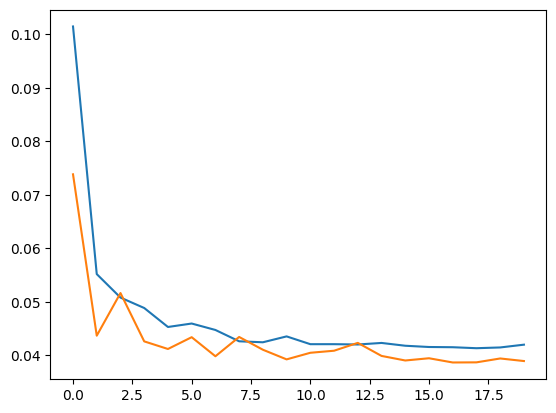


For feature number = 5


NameError: name 'accuracy_score' is not defined

In [63]:
fset=[5,10,15,20,25,30]

for i in fset:
  feat_num=i
  idx[0:feat_num]
  X_trains = X_train[:, idx[0:feat_num]]
  X_tests= X_test[:, idx[0:feat_num]]

  model = Sequential()

  # first parameter is output size=1
  model.add(LSTM(50, input_shape=(feat_num,1)))
  model.add(Dense(1))
  model.summary()
  model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])
  history=model.fit(X_trains, y_train, epochs=20, validation_data=(X_tests, y_test), batch_size=72, verbose=2, shuffle=False)
  result=model.predict(X_tests)

  pyplot.plot(history.history['loss'], label='result1')
  pyplot.plot(history.history['val_loss'], label='result1')
  pyplot.show()

  # Convert prediction probabilities to binary output
  y_pred = [1 if res > 0.5 else 0 for res in result]

  # Calculate Metrics
  print(f"\nFor feature number = {i}")
  print("Detection Rate (Accuracy):", accuracy_score(y_test, y_pred))
  print("Precision, Recall, F-score, Support:", precision_recall_fscore_support(y_test, y_pred, average='binary'))

  # Calculate False Positive Rate from confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  fpr = fp / (fp + tn)
  print("False Positive Rate:", fpr)

  scores = model.evaluate(X_tests, y_test, batch_size=64)
  print("Test loss, test acc:", scores, '\n')

In [68]:
 y_pred = [1 if res > 0.5 else 0 for res in result]
y_pred

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


In [69]:
print(confusion_matrix(y_test, y_pred))

[[159407    237      0      0      0]
 [   123  76522      0      0      0]
 [   825     44      0      0      0]
 [    10      0      0      0      0]
 [   380      9      0      0      0]]


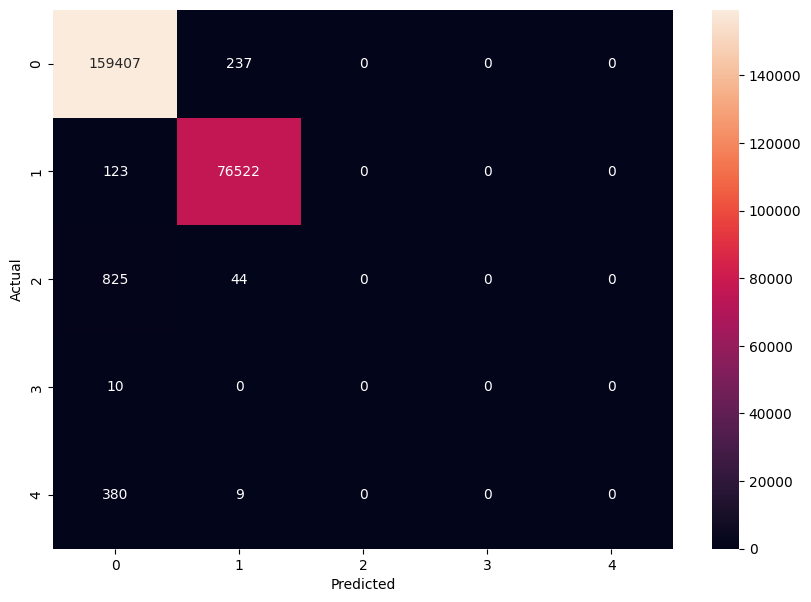

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
def calculate_tpr_fpr(y_test, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [72]:
def get_all_roc_coordinates(y_test, y_pred):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [73]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [74]:
scale = 3.5
size = 500

In [75]:
class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

In [76]:
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

<Axes: >

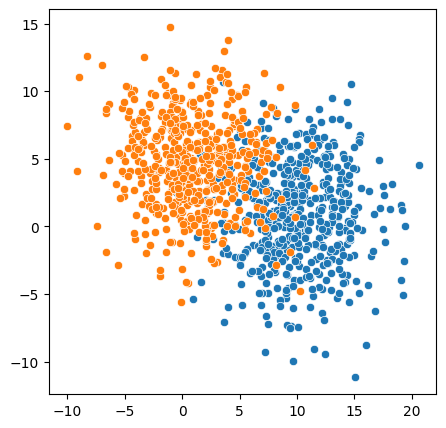

In [79]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = class1_x, y = class1_y)
sns.scatterplot(x = class2_x, y = class2_y)

In [ ]:
from sklearn.metrics import confusion_matrix

In [87]:
model = RandomForestRegressor()

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
model.fit(X_trains, y_train)

RandomForestRegressor()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from scipy.special import softmax

In [95]:
def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

In [96]:
def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [97]:
def evaluate_regression(y, y_pred):
    
    '''
    Prints the most common evaluation metrics for regression
    '''
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)
    
    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

In [103]:
from sklearn.datasets import load_diabetesz


ImportError: cannot import name 'load_diabetesz' from 'sklearn.datasets' (C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\__init__.py)

In [102]:
 pip install datasets

  Using cached aiohttp-3.9.5-cp311-cp311-win_amd64.whl.metadata (7.7 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp311-cp311-win_amd64.whl.metadata (32 kB)
   ---------------------------------------- 0.0/542.0 kB ? eta -:--:--
   ------ --------------------------------- 92.2/542.0 kB 2.6 MB/s eta 0:00:01
   ------------ --------------------------- 174.1/542.0 kB 2.6 MB/s eta 0:00:01
   --------------------- ------------------ 286.7/542.0 kB 2.5 MB/s eta 0:00:01
   ----------------------------- ---------- 399.4/542.0 kB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 471.0/542.0 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 542.0/542.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ------------------

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = RandomForestRegressor()
# Fits the model on the training data
model.fit(X_train, y_train)
RandomForestRegressor()
# Evaluates the model
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)

In [107]:
print_feature_importances_random_forest(model)

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

In [ ]:


import shap
